In [1]:
import pandas as pd

In [2]:
# Load the Excel file
kundendatei = pd.read_excel("./raw_data/Kundendatei.xlsx", sheet_name="Kundenobjekte")

In [3]:
kundendatei.info()  # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 61 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WirtEinh               973 non-null    int64  
 1   EQ_übergeordnet        364 non-null    float64
 2   Equipment              973 non-null    int64  
 3   EQ-Bezeichnung         973 non-null    object 
 4   EQ-Klasse              973 non-null    int64  
 5   EQ-Klasse-Bezeichnung  973 non-null    object 
 6   Gewerk                 973 non-null    object 
 7   Anlagenausprägung      973 non-null    object 
 8   EQ-Menge               973 non-null    int64  
 9   EQ-Merkmal_001         506 non-null    object 
 10  EQ-Merkmal_002         321 non-null    object 
 11  EQ-Merkmal_003         627 non-null    object 
 12  EQ-Merkmal_004         681 non-null    object 
 13  EQ-Merkmal_005         419 non-null    object 
 14  EQ-Merkmal_006         378 non-null    object 
 15  EQ-Mer

In [4]:
kundendatei.head()  # Display the first few rows of the DataFrame

,WirtEinh,EQ_übergeordnet,Equipment,EQ-Bezeichnung,EQ-Klasse,EQ-Klasse-Bezeichnung,Gewerk,Anlagenausprägung,EQ-Menge,EQ-Merkmal_001,...,EQ-Merkmal_043,EQ-Merkmal_044,EQ-Merkmal_045,EQ-Merkmal_046,EQ-Merkmal_047,EQ-Merkmal_048,EQ-Merkmal_049,EQ-Merkmal_050,EQ-Merkmal_051,EQ-Merkmal_052
0,21083,NaN,1000005794,Schutzraumlüftung - Mitt.(Außer Betrieb),31211,Lüftungsanlagen,RLT,Schutzraumlüft. ohne Sandfilt.,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21083,NaN,1000005932,RLT Batterieraum alt - Mittelbau,31211,Lüftungsanlagen,RLT,Zu-/Abluftanlage,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21083,NaN,1000005934,RLT Gleichr. alt - Mittelbau,31211,Lüftungsanlagen,RLT,Zu-/Abluftanlage,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21083,NaN,1000025596,"Gebäude-Blitzschutz-, Erdungsanl., Pot.",3330,Blitzschutz-/Erdungsanlage,Elektro Blitzschutz,Blitzschutz/Erdung Gebäude,1,Ableiter Anzahl aussen: 11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21083,NaN,1000026066,Beschallungs-/Sprechanlagen,3520,Elektroakustische Anlagen,Haustechn Einricht,Beschallungsanlage,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Clean the data same as reference:

columns that can be used as organizers/classifiers/categorizers are:

- Anlagenausprägung
- Gewerk
- EQ-Klasse-Bezeichnung
- EQ-Klasse
- EQ-Bezeichnung

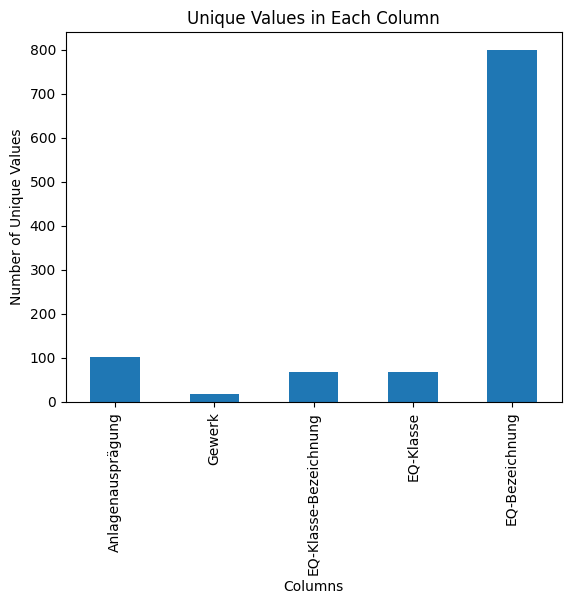

In [5]:
import matplotlib.pyplot as plt
# Plot the number of unique values for columns Anlagenausprägung, Gewerk, EQ-Klasse-Bezeichnung, EQ-Klasse, EQ-Bezeichnung
categorizers = kundendatei[['Anlagenausprägung', 'Gewerk', 'EQ-Klasse-Bezeichnung', 'EQ-Klasse', 'EQ-Bezeichnung']]
categorizers.nunique().plot(kind='bar')
plt.title("Unique Values in Each Column")
plt.xlabel("Columns")
plt.ylabel("Number of Unique Values")
plt.show()

In [6]:
len(categorizers['EQ-Klasse']) == len(categorizers['EQ-Klasse-Bezeichnung'])  # Check if EQ-Klasse and EQ-Klasse-Bezeichnung have the same number of unique values

True

In [7]:
# check values of Gewerk:
print("Unique values in 'Gewerk':", kundendatei['Gewerk'].unique())
print("Number of unique values in 'Gewerk':", kundendatei['Gewerk'].nunique())


Unique values in 'Gewerk': ['RLT' 'Elektro Blitzschutz' 'Haustechn Einricht' 'Sanitär' 'Elektro NSP'
 'Elektro' 'BuES, GLT, IZS' 'Brandschutz' 'Kältetechnik' 'Heizung'
 'Türen und Tore' 'Aufzug' 'Kältetechnik mit Hygiene' 'GEV'
 'RLT mit Hygiene' 'DLÜA' 'Elektro Ladesäulen']
Number of unique values in 'Gewerk': 17


In [8]:
# a lot of repetitions likke Elektro Blitzschutz, etc.
# normalize Gewerk values so that Elektro Blitzschutz becomes Elektro, Kältetechnik mit Hygiene becomes Kältetechnik, etc. Do it one by one, no splitting.
kundendatei['Gewerk'] = kundendatei['Gewerk'].replace({
    'Elektro Blitzschutz': 'Elektro',
    'Elektro NSP': 'Elektro',
    'Elektro Ladesäulen': 'Elektro',
    'RLT mit Hygiene': 'RLT',
    'Kältetechnik mit Hygiene': 'Kältetechnik',
})
# check again
print("Unique values in 'Gewerk' after normalization:", kundendatei['Gewerk'].unique())
print("Number of unique values in 'Gewerk' after normalization:", kundendatei['Gewerk'].nunique())



Unique values in 'Gewerk' after normalization: ['RLT' 'Elektro' 'Haustechn Einricht' 'Sanitär' 'BuES, GLT, IZS'
 'Brandschutz' 'Kältetechnik' 'Heizung' 'Türen und Tore' 'Aufzug' 'GEV'
 'DLÜA']
Number of unique values in 'Gewerk' after normalization: 12


In [9]:
# see how many gebäude there are
gebs = kundendatei['WirtEinh'].unique()
print(f"Number of unique buildings: {len(gebs)}")
print("Unique buildings:", gebs)

Number of unique buildings: 7
Unique buildings: [21083 28580 22225 30009 18925 15859 26287]


In [10]:
for geb in gebs:
    geb_df = kundendatei[kundendatei['WirtEinh'] == geb]
    geb_df.to_csv(f"./customer_data/csvs/building_{geb}.csv", index=False)
    print(f"Saved data for {geb} to building_{geb}.csv")

Saved data for 21083 to building_21083.csv
Saved data for 28580 to building_28580.csv
Saved data for 22225 to building_22225.csv
Saved data for 30009 to building_30009.csv
Saved data for 18925 to building_18925.csv
Saved data for 15859 to building_15859.csv
Saved data for 26287 to building_26287.csv


Categorization should be then based on this sequence:

Gewerk > EQ-Klasse-Bezeichnung (Corresponding ID from EQ-Klasse) > Anlagenausprägung > Anlagen > Bauteile.

Each anlage will be recognized by if the row HAS a EQ_übergeordnet value or not.

In [11]:
# iterate through each csv
## make sure that the length of the dataframe is equal to the number of unique values in Equipment

import glob
geb_cs_csvs = glob.glob("./customer_data/csvs/*.csv")
for csv_file in geb_cs_csvs:
    df = pd.read_csv(csv_file)
    unique_equipments = df['Equipment'].unique()
    print(f"File: {csv_file}")
    if len(unique_equipments) != len(df):
        print(f"   Number of unique Anlagen/Equipments: {len(unique_equipments)}")
        print(f"   Number of rows in the DataFrame: {len(df)}")
        print("   Warning: The lengths are not equal!")
    else:
        print("   OK")
    print("----------")

File: ./customer_data/csvs/building_28580.csv
   OK
----------
File: ./customer_data/csvs/building_30009.csv
   OK
----------
File: ./customer_data/csvs/building_26287.csv
   OK
----------
File: ./customer_data/csvs/building_22225.csv
   OK
----------
File: ./customer_data/csvs/building_15859.csv
   OK
----------
File: ./customer_data/csvs/building_21083.csv
   OK
----------
File: ./customer_data/csvs/building_18925.csv
   OK
----------


### Create general Hierarchy of the customer data

In [13]:
# iterate through each Gebäude and create a list of dicts, save it as JSON
import json
for geb in geb_cs_csvs:
    df = pd.read_csv(geb)
    print(f"Processing {geb}...")
    anlagen_geb = {}
    filter_for_anlagen = df[df['EQ_übergeordnet'].isna()]
    filter_for_bauteile = df[df['EQ_übergeordnet'].notna()]
    categories = filter_for_anlagen['Gewerk'].unique()
    for category in categories:
        category_df = filter_for_anlagen[filter_for_anlagen['Gewerk'] == category]
        anlagen_geb[category] = {'id': None, 'subcategories': []}
        subcategories_id = category_df['EQ-Klasse'].unique()
        for id in subcategories_id:
            subcategory_id_df = category_df[category_df['EQ-Klasse'] == id]
            anlagen_geb[category]['subcategories'].append({
                int(id): []}
                )
            for subcategory in subcategory_id_df['EQ-Klasse-Bezeichnung'].unique():
                subcategory_df = subcategory_id_df[subcategory_id_df['EQ-Klasse-Bezeichnung'] == subcategory]
                anlagen_geb[category]['subcategories'][-1][int(id)] = {
                    subcategory: list(subcategory_df['Anlagenausprägung'].unique())
                }

    # Save the anlagen_geb dictionary to a JSON file
    with open(f"./customer_data/jsons/anlagen_geb_{geb.split('/')[-1].replace('.csv', '.json')}", 'w') as json_file:
        json.dump(anlagen_geb, json_file, indent=4, ensure_ascii=False)

Processing ./customer_data/csvs/building_28580.csv...
Processing ./customer_data/csvs/building_30009.csv...
Processing ./customer_data/csvs/building_26287.csv...
Processing ./customer_data/csvs/building_22225.csv...
Processing ./customer_data/csvs/building_15859.csv...
Processing ./customer_data/csvs/building_21083.csv...
Processing ./customer_data/csvs/building_18925.csv...


In [14]:
# iterate through each Gebäude and create a list of dicts, save it as JSON
df = kundendatei.copy()  # Use the original DataFrame for processing
anlagen_geb = {}
filter_for_anlagen = df[df['EQ_übergeordnet'].isna()]
filter_for_bauteile = df[df['EQ_übergeordnet'].notna()]
categories = filter_for_anlagen['Gewerk'].unique()
for category in categories:
    category_df = filter_for_anlagen[filter_for_anlagen['Gewerk'] == category]
    anlagen_geb[category] = {'id': None, 'subcategories': []}
    subcategories_id = category_df['EQ-Klasse'].unique()
    for id in subcategories_id:
        subcategory_id_df = category_df[category_df['EQ-Klasse'] == id]
        anlagen_geb[category]['subcategories'].append({
            int(id): []}
            )
        for subcategory in subcategory_id_df['EQ-Klasse-Bezeichnung'].unique():
            subcategory_df = subcategory_id_df[subcategory_id_df['EQ-Klasse-Bezeichnung'] == subcategory]
            anlagen_geb[category]['subcategories'][-1][int(id)] = {
                subcategory: list(subcategory_df['Anlagenausprägung'].unique())
            }

# Save the anlagen_geb dictionary to a JSON file
with open(f"./customer_data/structure.json", 'w') as json_file:
    json.dump(anlagen_geb, json_file, indent=4, ensure_ascii=False)